## Technical Requirements

In [1]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [ ]:
# !pip install jupyter
# pip install snorkel
# pip install scikit-learn
# pip install Pillow
# pip install tensorflow
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install imblearn

### Statistical Methods
Statistical methods provide valuable tools for identifying outliers and anomalies in our data, aiding in data preprocessing and decision-making. In this section, we’ll talk about how to use methods like Z-Scores, IQR, box plots and scatter plots, to uncover anomalies in our data.

#### Z-Score
Z-scores, also known as standard scores, are a statistical measure that indicates how many standard deviations a data point is away from the mean of the data. Z-scores are used to standardize data and allow for comparisons between different datasets, even if they have different units or scales. They are particularly useful in detecting outliers and identifying extreme values in a dataset. The formula to calculate the Z-score for a data point x in a dataset with mean μ and standard deviation σ is given by:

Z=(x-μ)/σ

Where:

Z is the Z-score of the data point x.
x is the value of the data point.
μ is the mean of the dataset.
σ is the standard deviation of the dataset.

Z-scores are widely used to detect outliers in a dataset. Data points with Z-scores that fall outside a certain threshold (e.g., Z > 3 or Z < -3) are considered outliers. These outliers can represent extreme values or measurement errors in the data. Z-scores are used to standardize data, making it comparable across different datasets. By transforming the data into Z-scores, the mean becomes 0, and the standard deviation becomes 1, resulting in a standardized distribution.

Z-scores are employed in normality testing to assess whether a dataset follows a normal (Gaussian) distribution. If the dataset follows a normal distribution, approximately 68% of the data points should have Z-scores between -1 and 1, about 95% between -2 and 2, and nearly all between -3 and 3. In hypothesis testing, Z-scores are used to compute p-values and make inferences about population parameters. 

For example, Z-tests are commonly used for sample mean comparisons when the population standard deviation is known. Z-scores can be useful in anomaly detection where we want to identify data points that deviate significantly from the norm. High Z-scores may indicate anomalous behaviour or rare events in the data. 

Lets explore this concept in Python using the Loan Prediction dataset. Let's start by loading the dataset:


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('train_loan_prediction.csv')
df.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


Now that we have loaded the dataset, we can calculate the Z-scores on some of the numerical features:

In [4]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
z_scores = df[numerical_features].apply(lambda x: (x - np.mean(x)) / np.std(x))
#We will leverage Z-scores to detect outliers in our dataset effectively. 
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outliers['is_outlier'] = outliers.any(axis=1)
outlier_rows = df[outliers['is_outlier']]
outlier_rows 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N


By setting a Z-score threshold of 3, we can identify outliers by examining if any rows have values that lie beyond the Z-score boundaries of greater than 3 or less than -3. This approach allows us to pinpoint data points that deviate significantly from the mean and enables us to take appropriate actions to handle these outliers, ensuring the integrity of our data and the accuracy of subsequent analyses and models.

##### IQR (Interquartile Range)
Interquartile Range (IQR) is a statistical measure used to describe the spread or dispersion of a dataset. It is particularly useful in identifying and handling outliers and understanding the central tendency of the data. The IQR is defined as the range between the first quartile (Q1) and the third quartile (Q3) of a dataset. Quartiles are points that divide a dataset into four equal parts, each containing 25% of the data. 

The IQR can be calculated using the following formula:

IQR = Q3 - Q1

Where:
- Q1 is the first quartile (25th percentile), representing the value below which 25% of the data lies.
- Q3 is the third quartile (75th percentile), representing the value below which 75% of the data lies.

IQR is commonly used to identify outliers in a dataset. Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers and may warrant further investigation. IQR provides valuable information about the distribution of the data. It helps to understand the spread of the middle 50% of the dataset and can be used to assess the symmetry of the distribution. When comparing datasets, IQR can be used to assess the differences in the spread of data between two or more datasets.

Here's a simple example of how to calculate the IQR for a dataset using Python and NumPy on Loan Prediction dataset. To begin with outlier detection, we calculate the Interquartile Range (IQR) for numerical features. By defining a threshold, typically 1.5 times the Interquartile Range (IQR) based on Tukey's method, which involves calculating the IQR as the difference between the third quartile (Q3) and the first quartile (Q1), we can identify outliers. Tukey's method is a robust statistical technique that aids in detecting data points that deviate significantly from the overall distribution, providing a reliable measure for identifying potential anomalies in the dataset.. Once the outliers are flagged for all numerical features, we can display the rows with outlier values, which aids in further analysis and potential data treatment. Using the IQR and Tukey's method together facilitates effective outlier detection and helps ensure the integrity of the dataset.


In [5]:
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = (df[numerical_features] < (Q1 - threshold * IQR)) | (df[numerical_features] > (Q3 + threshold * IQR))
outliers['is_outlier'] = outliers.any(axis=1)
outlier_rows = df[outliers['is_outlier']]
outlier_rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In conclusion, the exploration of Interquartile Range (IQR) provides a valuable technique for identifying outliers, particularly effective in capturing the central tendencies of a dataset. While IQR proves advantageous in scenarios where a focus on the middle range is paramount, it's essential to recognize its limitations in capturing the entire data distribution. In the upcoming section on Box-plot, we will delve into a graphical representation that complements IQR, offering a visual tool to better understand data dispersion and outliers in diverse contexts.

#### Box-Plot
Box plots, also known as box-and-whisker plots, are a graphical representation of the distribution of a dataset. They provide a quick and informative way to visualize the spread and skewness of the data, identify potential outliers, and compare multiple datasets. Box plots are particularly useful when dealing with continuous numerical data and can be used to gain insights into the central tendency and variability of the data.

Here are the components of a box-plot: 

- Box (Interquartile Range, IQR): The box represents the Interquartile Range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3) of the data. It spans the middle 50% of the dataset and provides a visual representation of the data's spread.
- Median (Q2): The median, represented by a horizontal line inside the box, indicates the central value of the dataset. It divides the data into two equal halves, with 50% of the data points below and 50% above the median.
- Whiskers: The whiskers extend from the edges of the box to the furthest data points that lie within the "whisker length." The length of the whiskers is typically determined by a factor (e.g., 1.5 times the IQR) and is used to identify potential outliers.
- Outliers: Data points lying beyond the whiskers are considered outliers and are usually plotted individually as individual points or circles. They are data points that deviate significantly from the central distribution and may warrant further investigation.

Following are the benefits of box-plots:

- Visualizing Data Distribution: Box plots offer an intuitive way to see the spread and skewness of the data, as well as identify any potential data clusters or gaps.
- Comparing Datasets: Box plots are useful for comparing multiple datasets side by side, allowing for easy comparisons of central tendencies and variabilities.
- Outlier Detection: Box plots facilitate outlier detection by highlighting data points that lie beyond the whiskers, helping identify unusual or extreme values.
- Handling Skewed Data: Box plots are robust to the influence of extreme values and can handle skewed data distributions more effectively than traditional mean and standard deviation.

Let's implement this approach using the matplotlib library in Python. Here we will produce 2 box-plots for ‘ApplicantIncome’ and ‘LoanAmount’.


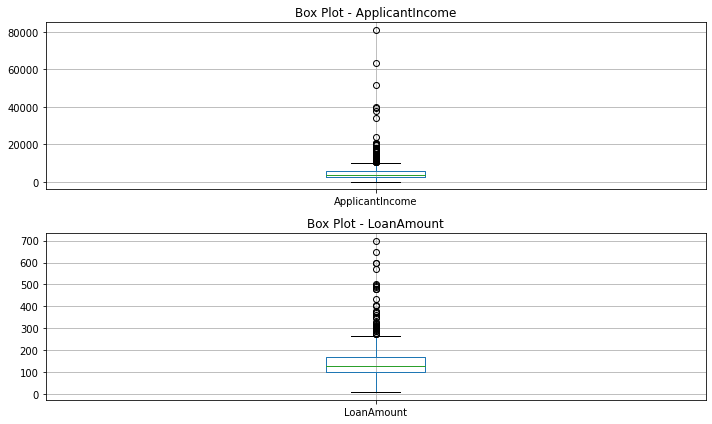

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
df.boxplot(column='ApplicantIncome')
plt.title('Box Plot - ApplicantIncome')
plt.subplot(2, 1, 2)
df.boxplot(column='LoanAmount')
plt.title('Box Plot - LoanAmount')

plt.tight_layout()
plt.show()

In summarizing the use of Box-plot, we find it to be a powerful visual aid, complementing IQR in portraying both central tendencies and data dispersion. While Box-plots excel in providing a holistic view, it's crucial to acknowledge that they may not capture all nuances of complex datasets. In the next section on Scatter plots, we will explore a versatile graphical tool that offers a broader perspective, facilitating the identification of relationships and patterns between variables in our data.

#### Scatter Plot
Scatter plots are a popular and versatile data visualization technique used to explore the relationship between two continuous numerical variables. They provide a clear visual representation of how one variable (the independent variable) affects or influences another (the dependent variable). Scatter plots are especially useful in identifying patterns, correlations, clusters, and outliers in the data, making them an essential tool in data analysis and exploratory data analysis (EDA).

Here's how scatter plots are constructed and their key characteristics:

Scatter Plot Construction

To create a scatter plot, the values of the two numerical variables are plotted as points on a Cartesian coordinate system. Each point represents a data observation, where the x-coordinate corresponds to the value of the independent variable, and the y-coordinate corresponds to the value of the dependent variable. Multiple data points collectively form a scatter plot that provides insights into the relationship between the two variables.

Key Characteristics of Scatter Plots

Following are some of the key characteristics of scatter plots:

- Correlation: Scatter plots help us assess the correlation or relationship between the two variables. If the points on the plot appear to form a clear trend or pattern (e.g., a linear or non-linear trend), it suggests a significant correlation between the variables. If the points are scattered randomly, there might be no or weak correlation.
- Cluster Analysis: Scatter plots can reveal clusters of data points, indicating potential subgroups or patterns within the data.
- Outlier Detection: Scatter plots facilitate outlier detection by identifying data points that lie far away from the main cluster of points.
- Data Spread: The spread or distribution of the data points along the x and y axes provides insights into the variability of the variables.
- Visualizing Regression Lines: In some cases, a regression line can be fitted to the scatter plot to model the relationship between the variables and make predictions.


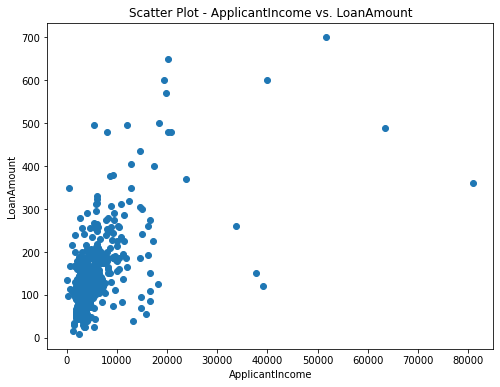

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Scatter Plot - ApplicantIncome vs. LoanAmount')
plt.show()

As you can see, some points are notably distant from the majority of the population, suggesting the presence of potential outliers. These outlying data points stand apart from the overall pattern, warranting further investigation to understand their significance and impact on the relationship between the two variables. Identifying and handling outliers is crucial for ensuring accurate data analysis and model performance. By visualizing the scatter plot, we can gain valuable insights into the data distribution and correlations, paving the way for effective decision-making and data exploration.

### Anomaly Detection

Anomaly detection is a specific approach to detecting rare events, where the focus is on identifying instances that significantly deviate from the norm or normal behaviour. Anomalies can be caused by rare events, errors, or unusual patterns that are not typical in the dataset. This technique is particularly useful when there is limited or no labelled data for the rare events. Common anomaly detection algorithms include:

- Unsupervised Methods: Techniques like Isolation Forest and One-Class SVM can be used to identify anomalies in data without requiring labelled examples of the rare event.
- Semi-Supervised Methods: These approaches combine both normal and abnormal data during training but have only a limited number of labelled anomalies. Autoencoders and Variational Autoencoders are examples of semi-supervised anomaly detection algorithms.
- Supervised Methods: If a small number of labelled anomalies are available, supervised learning algorithms like Random Forest, Support Vector Machines (SVM), and Neural Networks can be used for anomaly detection.

Let’s understand these methods in detail with Python code examples.

#### Unsupervised Method using Isolation Forest

Isolation Forest is an efficient and effective algorithm used for anomaly detection in unsupervised learning scenarios. It works by isolating anomalies or rare events in the data by constructing isolation trees (random decision trees) that separate the anomalies from the majority of the normal data points. It was introduced by Fei Tony Liu, Kai Ming Ting, and Zhi-Hua Zhou in their 2008 paper titled “Isolation Forest.” Here are some key concepts and features of the Isolation Forest algorithm:

- Random Partitioning: Isolation Forest uses a random partitioning strategy to create isolation trees. At each step of constructing a tree, a random feature is selected, and a random split value within the range of the selected feature’s values is chosen to create a node. This random partitioning leads to shorter paths for anomalies, making them easier to isolate from normal data points.
- Path Length: The key idea behind Isolation Forest is that anomalies are isolated into smaller partitions with fewer data points, while normal data points are distributed more uniformly across larger partitions. The average path length of a data point to reach an anomaly in the tree is used as a measure of its “isolation.”
- Anomaly Score: Based on the average path length, each data point is assigned an anomaly score. The anomaly score represents how easily the data point can be isolated or separated from the rest of the data. Shorter average path lengths correspond to higher anomaly scores, indicating that the data point is more likely to be an anomaly.
- Contamination Parameter: The Isolation Forest algorithm has a hyperparameter called “contamination,” which represents the expected proportion of anomalies in the dataset. This parameter helps in setting the threshold for identifying anomalies. The contamination parameter can be set explicitly or as “auto,” which estimates the contamination based on the dataset’s size.

Few advantages of Isolation Forest are as follows: 

- Isolation Forest is computationally efficient and scalable, making it suitable for large datasets. It does not require a large number of trees to achieve good performance, reducing the computational overhead. 
- The algorithm is relatively insensitive to the number of dimensions/features, which is particularly advantageous when dealing with high-dimensional datasets. Isolation Forest is an unsupervised learning algorithm, making it suitable for scenarios where labelled anomaly data is scarce or unavailable.
Limitations of Isolation Forest: 
- Isolation Forest may not perform well on datasets with multiple clusters of anomalies or when anomalies are close to the majority of normal data points. 
- Like most unsupervised algorithms, Isolation Forest may produce false positives (normal data points misclassified as anomalies) and false negatives (anomalies misclassified as normal data points).

Lets implement this approach in Python:

1.	Import Libraries: The code begins by importing the necessary libraries. Pandas is imported as pd to handle data in tabular format, and IsolationForest is imported from the sklearn.ensemble module for performing anomaly detection using the Isolation Forest algorithm.


In [9]:
import pandas as pd
from sklearn.ensemble import IsolationForest

2.	Extract Numerical Features: A list numerical_features is defined, containing the names of the numerical columns to be used for anomaly detection. These columns are ‘ApplicantIncome’, ‘CoapplicantIncome’, and ‘LoanAmount’.

In [11]:
Numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

3.	Create DataFrame for Anomaly Detection: A new DataFrame X_anomaly is created by extracting the columns specified in numerical_features from the original DataFrame df. This new DataFrame will be used for anomaly detection.

In [12]:
X_anomaly = df[numerical_features]

4.	Handle Missing Values: To handle any missing values in the X_anomaly DataFrame, the fillna() method is used with the mean of each column. This ensures that any missing values are replaced with the mean value of their respective columns.

In [13]:
X_anomaly.fillna(X_anomaly.mean(), inplace=True)

C:\Users\manmo\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


5.	Initialize Isolation Forest Model: The Isolation Forest model is initialized with IsolationForest(contamination=’auto’, random_state=42). The parameter contamination is set to ‘auto’, which means it will automatically detect the percentage of outliers in the dataset. The random_state is set to 42 to ensure reproducibility.

In [15]:
Isolation_forest = IsolationForest(contamination='auto', random_state=42)

6.	Fit the Model and Predict Anomalies: The Isolation Forest model is fitted to the X_anomaly data using the fit_predict() method. This method simultaneously fits the model to the data and predicts whether each data point is an outlier or not. The predictions are stored in the anomaly_predictions array.
7.	Add Anomaly Predictions to Original Dataset: The anomaly_predictions array contains the predicted labels for each data point: -1 for anomalies (outliers) and 1 for inliers (non-outliers). These predictions are added as a new column ‘IsAnomaly’ to the original DataFrame df.
8.	Display Rows with Anomalies: Finally, the code filters the rows in the DataFrame df where ‘IsAnomaly’ is equal to -1, indicating the presence of outliers. The resulting DataFrame anomalies contains all the rows with anomalies, which can then be further analyzed or processed as needed.

In [18]:
anomaly_predictions = Isolation_forest.fit_predict(X_anomaly)
df['IsAnomaly'] = anomaly_predictions
anomalies = df[df['IsAnomaly'] == -1]
anomalies.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IsAnomaly
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,-1
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y,-1
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y,-1
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y,-1
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,-1


### Semi-Supervised Methods Using Autoencoders

Anomaly Detection using Autoencoders is an unsupervised learning approach that leverages neural networks to detect anomalies in data. Autoencoders are a type of neural network architecture designed to reconstruct the input data from a compressed representation. In anomaly detection, we exploit the fact that autoencoders struggle to reconstruct anomalous instances, making them useful for identifying unusual patterns or outliers.

Autoencoders consist of two main components: the encoder and the decoder. The encoder compresses the input data into a lower-dimensional representation called the "latent space," while the decoder tries to reconstruct the original input from this representation. The encoder and decoder are typically symmetric, and the network is trained to minimize the reconstruction error.

In anomaly detection, we train the autoencoder on normal data without anomalies. Since the autoencoder learns to reconstruct normal data, it will be less capable of reconstructing anomalies, leading to higher reconstruction errors for anomalous instances. This property allows us to use the reconstruction error as an anomaly score.

During training, we compare the original input (e.g., numerical features) to the reconstructed output. The difference between the two is the reconstruction error. A low reconstruction error indicates that the input is close to the normal data distribution, while a high reconstruction error suggests that the input is likely an anomaly.

After training the autoencoder, we need to set a threshold to distinguish between normal and anomalous instances based on the reconstruction error. There are several methods to set the threshold, such as percentile-based or using validation data. The threshold will depend on the desired trade-off between false positives and false negatives, which can be adjusted based on the application's requirements.

Autoencoders are flexible and can capture complex patterns in the data, making them suitable for high-dimensional data with non-linear relationships. They can handle both global and local anomalies, meaning they can detect anomalies that differ from the majority of the data points and anomalies within specific regions of the data. Autoencoders are capable of unsupervised learning, which is advantageous when labelled anomaly data is limited or unavailable. Like other unsupervised methods, autoencoders may produce false positives (normal data misclassified as anomalies) and false negatives (anomalies misclassified as normal data). They may struggle to detect anomalies that are very similar to the normal data, as the reconstruction error might not be significantly different.

Lets see an example implementation of this approach using TensorFlow library and Loan Prediction dataset in Python.

- Load Data: The code begins by importing necessary libraries and loading the dataset from the file 'train_loan_prediction.csv' using pd.read_csv().


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

df = pd.read_csv('train_loan_prediction.csv')


- Extract Numerical Features: The code defines a list numerical_features containing the names of the numerical columns to be used for anomaly detection. These columns are 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount'

In [20]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

- Create DataFrame for Anomaly Detection: A new DataFrame X_anomaly is created by extracting the columns specified in numerical_features from the original DataFrame df. This new DataFrame will be used for anomaly detection.
- Handle Missing Values: Any missing values in the X_anomaly DataFrame are replaced with the mean value of their respective columns using fillna() method.


In [21]:
X_anomaly = df[numerical_features]
X_anomaly.fillna(X_anomaly.mean(), inplace=True)

C:\Users\manmo\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


- Standardize the Numerical Features: The numerical features in X_anomaly are standardized using StandardScaler(). Standardization scales the features to have zero mean and unit variance, which is important for training machine learning models.

In [22]:
original_indices = X_anomaly.index
scaler = StandardScaler()
X_anomaly_scaled = scaler.fit_transform(X_anomaly)

- Split Data into Training and Testing Sets: The standardized data is split into training (X_train) and testing (X_test) sets using train_test_split() function. The original indices of the data are also stored in original_indices.

In [23]:
X_train, X_test, _, _ = train_test_split(X_anomaly_scaled, original_indices, test_size=0.2, random_state=42)   
X_test_df = pd.DataFrame(X_test, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

- Build and Train Autoencoder Model: An autoencoder neural network model is constructed using TensorFlow's Keras API. The autoencoder is an unsupervised learning model designed to reconstruct the input data. It consists of an encoder and decoder, both composed of Dense layers. The model is trained using the fit() method with the mean squared error as the loss function.

In [24]:
input_dim = X_anomaly.shape[1]
encoding_dim = 2
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)
autoencoder = Model(inputs=input_layer, outputs=decoder_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_anomaly_scaled, X_anomaly_scaled, epochs=50, batch_size=16)

Epoch 1/50
39/39 [==============================] - 1s 3ms/step - loss: 1.2754
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 1.2592
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 1.2439
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 1.2294
Epoch 5/50
39/39 [==============================] - 0s 7ms/step - loss: 1.2155
Epoch 6/50
39/39 [==============================] - 0s 3ms/step - loss: 1.2020
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 1.1891
Epoch 8/50
39/39 [==============================] - 0s 1ms/step - loss: 1.1764
Epoch 9/50
39/39 [==============================] - 0s 994us/step - loss: 1.1639
Epoch 10/50
39/39 [==============================] - 0s 2ms/step - loss: 1.1512
Epoch 11/50
39/39 [==============================] - 0s 1ms/step - loss: 1.1387
Epoch 12/50
39/39 [==============================] - 0s 2ms/step - loss: 1.1257
Epoch 13/50
39/39 [============================

- Reconstruct Data and Calculate Reconstruction Error: The trained autoencoder is used to reconstruct the data points in X_test, and the reconstruction errors are calculated as the mean squared difference between the original and reconstructed data.

In [25]:
X_test_reconstructed = autoencoder.predict(X_test)
reconstruction_error_test = np.mean(np.square(X_test - X_test_reconstructed), axis=1)

4/4 [==============================] - 0s 7ms/step


- Define Threshold for Anomaly Detection: A threshold for anomaly detection is defined by calculating the 95th percentile of the reconstruction errors in X_test.

In [26]:
threshold = np.percentile(reconstruction_error_test, 95)

- Predict Anomalies: Anomalies are predicted by comparing the reconstruction errors against the threshold. If the reconstruction error for a data point is greater than the threshold, it is classified as an anomaly and assigned a value of 1 in anomaly_predictions, otherwise, it is assigned 0.

In [27]:
anomaly_predictions = (reconstruction_error_test > threshold).astype(int)

- Create a New DataFrame with Anomaly Predictions: A new DataFrame anomaly_df is created with the anomaly predictions and the corresponding index from X_test_df.

In [28]:
anomaly_df = pd.DataFrame({'IsAnomaly': anomaly_predictions}, index=X_test_df.index)

- Merge Anomaly Predictions with the Original DataFrame: The anomaly predictions are merged with the original DataFrame df using merge() method, adding the 'IsAnomaly' column to df.
- Display Rows with Anomalies: The code checks if the 'IsAnomaly' column is present in df. If present, it displays the rows where 'IsAnomaly' is equal to 1, indicating the presence of anomalies. If not present, it prints "No anomalies detected."


In [29]:
df = df.merge(anomaly_df, how='left', left_index=True, right_index=True)

if 'IsAnomaly' in df.columns:
    # Display the rows with anomalies
    anomalies = df[df['IsAnomaly'] == 1]
    anomalies
else:
    print("No anomalies detected.")


In [31]:
df[df['IsAnomaly'] == 1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IsAnomaly
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N,1.0
60,LP001205,Male,Yes,0,Graduate,No,2500,3796.0,120.0,360.0,1.0,Urban,Y,1.0
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N,1.0
89,LP001310,Male,Yes,0,Graduate,No,5695,4167.0,175.0,360.0,1.0,Semiurban,Y,1.0
90,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y,1.0
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,1.0
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y,1.0


### Supervised Methods Using Support Vector Machines (SVM):
Support Vector Machines (SVM) are a powerful class of supervised learning algorithms commonly used for classification tasks. When applied to anomaly detection, SVMs prove to be effective in separating normal instances from anomalies by finding a hyperplane with maximum margin. Here is how SVM work under the hood:

- Hyperplane Definition: In a two-dimensional space, a hyperplane is a flat, two-dimensional subspace. SVM aims to find a hyperplane that best separates the dataset into two classes — normal and anomalous. This hyperplane is positioned to maximize the margin, which is the distance between the hyperplane and the nearest data points of each class.
- Decision Boundary: The hyperplane serves as a decision boundary that separates instances of one class from another. In a binary classification scenario, instances on one side of the hyperplane are classified as belonging to one class, and those on the other side are classified as belonging to the other class.
- Kernel Trick: SVM can handle complex relationships in the data through the use of a kernel function. In many real-world scenarios, the relationship between features may not be linear. SVM addresses this by using a kernel function. This function transforms the input data into a higher-dimensional space, making it easier to find a hyperplane that effectively separates the classes. Commonly used kernel functions include the linear kernel (for linearly separable data), polynomial kernel, radial basis function (RBF) or Gaussian kernel, and sigmoid kernel. The choice of kernel depends on the nature of the data.
- Optimal Hyperplane: SVM aims to find the hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data points of each class. The larger the margin, the more robust and generalizable the model is likely to be. Support vectors are the data points that lie closest to the decision boundary. They play a crucial role in defining the optimal hyperplane and the margin. SVM focuses on these support vectors during training.

Lets implement a Python example of SVM in anomaly detection using our Loan Prediction dataset:

- Load Data: Let’s begin by importing necessary libraries and loading the dataset from the file 'train_loan_prediction.csv' using pd.read_csv().


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv('train_loan_prediction.csv')

- Data Pre-processing: We will do some basic data pre-processing tasks, including handling missing values. For this anomaly detection example, we simplify the analysis by excluding the categorical variables. In a more complex analysis, you might choose to encode and include these variables if they are deemed relevant to your specific anomaly detection task.

In [33]:
df = df.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis=1)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 0, 'N': 1})
df.fillna(df.mean(), inplace=True)

- Create Train-Test Split for the SVM model

In [34]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Standardize the features using StandardScaler from Scikit-learn to ensure that all features have the same scale.

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Train the One-Class SVM model for anomaly detection. Adjust the nu parameter based on the expected proportion of outliers in your dataset. The nu parameter represents an upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors. It essentially controls the proportion of outliers or anomalies the algorithm should consider. Choosing an appropriate value for nu is crucial, and it depends on the characteristics of your dataset and the expected proportion of anomalies. Here are some guidelines to help you select the nu parameter:
- Understand the Nature of Anomalies: Assess the domain knowledge and characteristics of your dataset. Understand the expected proportion of anomalies. If anomalies are rare, a smaller value of nu might be appropriate.
- Experiment with a Range of Values: Start by experimenting with a range of nu values, such as 0.01, 0.05, 0.1, 0.2, etc. You can adjust this range based on your understanding of the data.
- Consider the Dataset Size: The size of your dataset can also influence the choice of nu. For larger datasets, a smaller value might be suitable, while for smaller datasets, a relatively larger value may be appropriate.
- Balance False Positives and False Negatives: Depending on the application, you might prioritize minimizing false positives or false negatives. Adjust nu accordingly to achieve the desired balance.
- We will implement an experiment with range of values for nu. We will specify a list of nu values that we want to experiment with. These values represent the upper bound on the fraction of margin errors and the lower bound of the fraction of support vectors in the One-Class SVM. We then create an empty list to store the mean decision function values for each nu value.


In [36]:
nu_values = [0.01, 0.05, 0.1, 0.2, 0.3]
mean_decision_function_values = []


- For each nu value in the list, train a One-Class SVM model with that nu value. Retrieve the decision function values for the test set and calculate the mean decision function value. Append the mean decision function value to the list.

In [38]:
for nu in nu_values:
    svm_model = OneClassSVM(nu=nu, kernel='rbf', gamma=0.1)
    svm_model.fit(X_train_scaled)
    decision_function_values=svm_model.decision_function(X_test_scaled)
    mean_decision_function = np.mean(decision_function_values)
    mean_decision_function_values.append(mean_decision_function)

- Identify the index of the nu value that corresponds to the highest mean decision function value. Then, retrieve the best nu value

In [39]:
best_nu_index = np.argmax(mean_decision_function_values)
best_nu = nu_values[best_nu_index]

- Create the final One-Class SVM model using the best nu value and train it on the scaled training data.

In [40]:
final_model = OneClassSVM(nu=best_nu, kernel='rbf', gamma=0.1)
final_model.fit(X_train_scaled)

OneClassSVM(gamma=0.1, nu=0.2)

- We now use this model to predict anomalies on the test dataset X_test_scaled. This line creates a binary representation of the predictions (y_pred) by mapping -1 to 1 (indicating anomalies) and any other value (typically 1) to 0 (indicating normal instances). This is done because the One-Class SVM often assigns -1 to anomalies and 1 to normal instances. We will store this in a new dataframe as ‘df_with_anomalies’.

In [42]:
y_pred = final_model.predict(X_test_scaled)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]
test_set_df = pd.DataFrame(data=X_test_scaled, columns=X.columns, index=X_test.index)
test_set_df['Anomaly_Label'] = y_pred_binary
df_with_anomalies = pd.concat([df, test_set_df['Anomaly_Label']], axis=1, join='outer')
df_with_anomalies['Anomaly_Label'].fillna(0, inplace=True)

- Print the confusion matrix and accuracy

In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred_binary))
print("Accuracy Score:", accuracy_score(y_test, y_pred_binary))

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        80
           1       0.48      0.23      0.31        43

    accuracy                           0.64       123
   macro avg       0.58      0.55      0.54       123
weighted avg       0.61      0.64      0.60       123

Accuracy Score: 0.6422764227642277


- Print dataframe rows predicted as anomalies.

In [45]:
df_with_anomalies[df_with_anomalies['Anomaly_Label'] == 1]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Anomaly_Label
66,3200,2254.0,126.000000,180.0,0.000000,1,1.0
109,2071,754.0,94.000000,480.0,1.000000,0,1.0
135,4000,7750.0,290.000000,360.0,1.000000,1,1.0
155,39999,0.0,600.000000,180.0,0.000000,0,1.0
218,5000,0.0,72.000000,360.0,0.000000,1,1.0
228,4758,0.0,158.000000,480.0,1.000000,0,1.0
231,3716,0.0,42.000000,180.0,1.000000,0,1.0
248,2882,1843.0,123.000000,480.0,1.000000,0,1.0
250,1668,3890.0,201.000000,360.0,0.000000,1,1.0
260,6083,4250.0,330.000000,360.0,0.842199,0,1.0


### Data Augmentation and Resampling

Class imbalance is a common issue in datasets with rare events. In our case, the 'Loan_Status' of 'Y' might be significantly higher than 'N.' Class imbalance can adversely affect the model's performance, as the model tends to be biased towards the majority class. To address this, we will explore two resampling techniques:

- Oversampling: Increasing the number of instances in the minority class by generating synthetic samples. 
- Undersampling: Reducing the number of instances in the majority class to balance the class distribution. 

Let's discuss these resampling techniques in more detail.

#### Oversampling using SMOTE (Synthetic Minority Over-sampling Technique) 

The Synthetic Minority Over-sampling Technique (SMOTE) is a widely used resampling method for addressing class imbalance in machine learning datasets, especially when dealing with rare events or minority classes. SMOTE helps to generate synthetic samples for the minority class by interpolating between existing minority class samples. This technique aims to balance the class distribution by creating additional synthetic instances, thereby mitigating the effects of class imbalance. In a dataset with class imbalance, the minority class contains significantly fewer instances than the majority class. This can lead to biased model training, where the model tends to favor the majority class and performs poorly on the minority class.
Here are the key steps of a SMOTE Algorithm:

1.	Identify Minority Class Instances: The first step of SMOTE is to identify the instances belonging to the minority class.
2.	Selecting Nearest Neighbors: For each minority class instance, SMOTE selects its k nearest neighbours (commonly chosen through the k-nearest neighbours algorithm). These neighbours are used to create synthetic samples.
3.	Creating Synthetic Samples: For each minority class instance, SMOTE generates synthetic samples along the line connecting the instance to its k nearest neighbours in the feature space. The synthetic samples are created by adding a random fraction (usually between 0 and 1) of the feature differences between the instance and its neighbours. This process effectively introduces variability to the synthetic samples.
4.	Combining with the Original Data: The synthetic samples are combined with the original minority class instances, resulting in a resampled dataset with a more balanced class distribution.

SMOTE helps to address class imbalance without discarding any data, as it generates synthetic samples rather than removing instances from the majority class. It increases the information available to the model, potentially improving the model's ability to generalize to the minority class. SMOTE is straightforward to implement and is available in popular libraries such as imbalanced-learn in Python.

While SMOTE is effective in many cases, it might not always perform optimally for highly imbalanced datasets or datasets with complex decision boundaries. Generating too many synthetic samples can lead to overfitting on the training data, so it is crucial to choose an appropriate value for the number of nearest neighbours (k). SMOTE may introduce some noise and may not be as effective if the minority class is too sparse or scattered in the feature space. SMOTE can be combined with other techniques, such as undersampling the majority class or using different resampling ratios, to achieve better performance. It is essential to evaluate the model's performance on appropriate metrics (e.g., precision, recall, F1-score) to assess the impact of SMOTE and other techniques on the model's ability to detect rare events.

Lets implement this approach in Python:

- Load Data: The code starts by importing necessary libraries and loading the Loan Prediction dataset from the file 'train_loan_prediction.csv' using pd.read_csv().


In [46]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('train_loan_prediction.csv')

- Mapping Target Variable: The 'Loan_Status' column in the dataset contains categorical values 'Y' and 'N', which represent loan approval ('Y') and rejection ('N'). To convert this categorical target variable into numerical format, 'Y' is mapped to 1 and 'N' is mapped to 0 using the map() function.

In [47]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

- Handle Missing Values: The code applies mean imputation to all columns with missing values in the dataset using the fillna() method. This ensures that any missing values in the dataset are replaced with the mean value of their respective columns.

In [48]:
df.fillna(df.mean(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


- Exclude Non-Numerical Columns: The code selects only the numerical columns from the dataset to build the feature set X. The select_dtypes() method is used to include only columns with data types 'float' and 'int', while excluding non-numerical columns such as 'Loan_Status' and 'Loan_ID'. The target variable y is set to 'Loan_Status'.

In [49]:
numerical_columns = df.select_dtypes(include=[float, int]).columns
X = df[numerical_columns].drop('Loan_Status', axis=1)
y = df['Loan_Status']

- Split Data into Training and Testing Sets: The data is split into training (X_train, y_train) and testing (X_test, y_test) sets using train_test_split() function from scikit-learn. The training set consists of 80% of the data, while the testing set contains 20% of the data. The random_state parameter is set to 42 to ensure reproducibility.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Instantiate SMOTE: Here, SMOTE is instantiated with SMOTE(random_state=42). SMOTE is then applied to the training data using the fit_resample() method. This method oversamples the minority class (loan rejection) by generating synthetic samples, creating a balanced dataset. The resulting resampled data is stored in X_train_resampled and y_train_resampled.

In [51]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

- Train Random Forest Classifier: A Random Forest Classifier is instantiated with RandomForestClassifier(random_state=42). The classifier is trained on the resampled data (X_train_resampled, y_train_resampled) using the fit() method. The trained classifier is used to make predictions on the test data (X_test) using the predict() method. The predictions are stored in y_pred.

In [52]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)

- The classification report is generated using the classification_report() function from scikit-learn. The classification report provides precision, recall, F1-score, and support for each class (loan approval and rejection) based on the predictions (y_pred) and the true labels (y_test) from the test set. The classification report is initially returned as a dictionary format. The code converts this dictionary to a DataFrame clf_report using pd.DataFrame(), making it easier to work with the data. The DataFrame clf_report is transposed using the .T attribute to have classes ('0' and '1') as rows and evaluation metrics (precision, recall, F1-score, and support) as columns. This transpose provides a more convenient and readable format for further analysis or presentation.

In [53]:
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report = clf_report.T
clf_report

,precision,recall,f1-score,support
0,0.733333,0.511628,0.602740,43.000000
1,0.774194,0.900000,0.832370,80.000000
accuracy,0.764228,0.764228,0.764228,0.764228
macro avg,0.753763,0.705814,0.717555,123.000000
weighted avg,0.759909,0.764228,0.752093,123.000000


#### Undersampling using RandomUnderSampler

Handling class imbalance with RandomUnderSampler is an effective approach to address the challenge of imbalanced datasets, where one class significantly outweighs the other class(es). In such cases, traditional machine learning algorithms may struggle to learn from the data and tend to be biased towards the majority class, leading to poor performance on the minority class or rare events.

RandomUnderSampler is a resampling technique that aims to balance the class distribution by randomly removing instances from the majority class until the class proportions become more balanced. By reducing the number of instances in the majority class, RandomUnderSampler ensures that the minority class is represented more proportionately, making it easier for the model to detect and learn patterns related to the rare events.

Here are some key points about handling class imbalance with RandomUnderSampler:

- Resampling for Class Balance: RandomUnderSampler is a type of data-level resampling method. Data-level resampling techniques involve manipulating the training data to balance the class distribution. In RandomUnderSampler, instances from the majority class are randomly selected and removed, resulting in a smaller dataset with a balanced class distribution.
- Preserving Minority Class Information: Unlike some other undersampling techniques that merge instances or create synthetic samples, RandomUnderSampler directly removes instances from the majority class without altering the minority class instances. This approach helps preserve the information from the minority class, making it easier for the model to focus on learning the patterns associated with the rare events.
- Potential Information Loss: One potential drawback of RandomUnderSampler is the loss of information from the majority class. By removing instances randomly, some informative instances may be discarded, potentially leading to a reduction in the model's ability to generalize on the majority class.
- Computationally Efficient: RandomUnderSampler is computationally efficient since it simply involves randomly removing instances from the majority class. This makes it faster compared to some other resampling methods.
- Choosing the Right Resampling Technique: While RandomUnderSampler can be effective in certain scenarios, it might not always be the best choice, especially if the majority class contains important patterns and information. Careful consideration of the problem and dataset characteristics is crucial when selecting the appropriate resampling technique.
- Combining with Other Techniques: In practice, RandomUnderSampler can be used in combination with other techniques. For example, one can apply RandomUnderSampler first and then use RandomOverSampler (oversampling) to further balance the class distribution. This approach helps in achieving a more balanced representation of both classes.
- Evaluation and Model Selection: When handling class imbalance, it is essential to evaluate the model's performance on relevant metrics such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC). These metrics provide a comprehensive assessment of the model's ability to handle rare events and edge cases.

Lets implement this approach using Python.

Load Data: The code begins by importing necessary libraries and loading the Loan Prediction dataset from the file 'train_loan_prediction.csv' using pd.read_csv(). 


In [54]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('train_loan_prediction.csv')

The 'Loan_Status' column in the dataset contains categorical values 'Y' and 'N', which represent loan approval ('Y') and rejection ('N'). To convert this categorical target variable into numerical format, 'Y' is mapped to 1 and 'N' is mapped to 0 using the map() function. 

In [55]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

Below code applies mean imputation to all columns with missing values in the dataset using the fillna() method. This ensures that any missing values in the dataset are replaced with the mean value of their respective columns.

In [56]:
df.fillna(df.mean(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


The code selects only the numerical columns from the dataset to build the feature set X. The select_dtypes() method is used to include only columns with data types 'float' and 'int', while excluding non-numerical columns such as 'Loan_Status' and 'Loan_ID'. The target variable y is set to 'Loan_Status'. 

In [57]:
numerical_columns = df.select_dtypes(include=[float, int]).columns
X = df[numerical_columns].drop('Loan_Status', axis=1)
y = df['Loan_Status']

The data is split into training (X_train, y_train) and testing (X_test, y_test) sets using train_test_split() function from scikit-learn. The training set consists of 80% of the data, while the testing set contains 20% of the data. The random_state parameter is set to 42 to ensure reproducibility.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We then instantiate RandomUnderSampler and apply to the training data using the fit_resample() method. This method undersamples the majority class (loan approval) to create a balanced dataset. The resulting resampled data is stored in X_train_resampled and y_train_resampled.

In [59]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

A Random Forest Classifier is then trained on the resampled data (X_train_resampled, y_train_resampled) using the fit() method. The trained classifier is used to make predictions on the test data (X_test) using the predict() method. The predictions are stored in y_pred.

In [60]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report = clf_report.T
clf_report

,precision,recall,f1-score,support
0,0.681818,0.697674,0.689655,43.000000
1,0.835443,0.825000,0.830189,80.000000
accuracy,0.780488,0.780488,0.780488,0.780488
macro avg,0.758631,0.761337,0.759922,123.000000
weighted avg,0.781737,0.780488,0.781059,123.000000


The model shows decent performance for both classes, with higher precision, recall, and F1-score for class '1' compared to class '0'.The weighted average considers the imbalance in class distribution, providing a more representative measure of overall performance. The accuracy of 78.4% suggests that the model correctly predicted the class for approximately 78.4% of instances in the test set.
In the next section, let's understand Cost-Sensitive Learning and explore its crucial role in scenarios where rare events bear significant consequences.


### Cost Sensitive Learning

Cost-sensitive learning is a machine learning approach that takes into account the costs associated with misclassifications of different classes during the model training process. In traditional machine learning, the focus is on maximizing overall accuracy, but in many real-world scenarios, misclassifying certain classes can have more severe consequences than misclassifying others.

For example, in a medical diagnosis application, misdiagnosing a severe disease as not present (false negative) could have more significant consequences than misdiagnosing a mild condition as present (false positive). In fraud detection, incorrectly flagging a legitimate transaction as fraudulent (false positive) might inconvenience the customer, while failing to detect actual fraudulent transactions (false negative) could lead to significant financial losses.

Cost-sensitive learning addresses these imbalances in costs by assigning different misclassification costs to different classes. By incorporating these costs into the training process, the model is encouraged to prioritize minimizing the overall misclassification cost rather than simply optimizing accuracy.

There are several approaches to implement cost-sensitive learning:

- Modifying Loss Functions: The loss function used during model training can be modified to incorporate class-specific misclassification costs. The goal is to minimize the expected cost, which is a combination of the misclassification costs and the model's predictions.
- Class Weights: Another approach is to assign higher weights to the minority class or the class with higher misclassification costs. This technique can be applied to various classifiers, such as decision trees, random forests, and support vector machines, to emphasize learning from the minority class.
- Sampling Techniques: In addition to assigning weights, resampling techniques like oversampling the minority class or undersampling the majority class can also be used to balance the class distribution and improve the model's ability to learn from rare events.
- Threshold Adjustment: By adjusting the classification threshold, we can control the trade-off between precision and recall, allowing us to make predictions that are more sensitive to the minority class.
- Ensemble Methods: Ensemble methods, such as cost-sensitive boosting, combine multiple models to focus on hard-to-classify instances and assign higher weights to misclassified samples.

Cost-sensitive learning is especially important in scenarios where the class imbalance is severe and the consequences of misclassification are critical. By taking into account the costs associated with different classes, the model can make more informed decisions and improve overall performance in detecting rare events and handling edge cases.

It is important to note that cost-sensitive learning requires careful consideration of the cost matrix, as incorrectly specified costs can lead to unintended results. Proper validation and evaluation of the model on relevant metrics, considering the real-world costs, are crucial to ensure the effectiveness and reliability of cost-sensitive learning algorithms.

To demonstrate cost-sensitive learning using the Loan Prediction dataset in Python.

- Load the required libraries and dataset using pandas.


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df = pd.read_csv('train_loan_prediction.csv')

- We now need to perform data pre-processing to handle missing values and to convert target variable to numeric data types.

In [62]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.fillna(df.mean(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


- For this example we will use only numeric columns. We will then split the dataset into train and test.

In [63]:
numerical_columns = df.select_dtypes(include=[float, int]).columns
X = df[numerical_columns].drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- We first calculate the class weights based on the inverse of class frequencies in the training data. The higher the frequency of a class, the lower its weight, and vice versa. This way, the model assigns higher importance to the minority class (rare events) and is more sensitive to its correct prediction.

In [64]:
class_weights = dict(1 / y_train.value_counts(normalize=True))

- Next, we train the Random Forest Classifier with the class_weight parameter set to the calculated class weights. This modification allows the classifier to consider the class weights during the training process, effectively implementing cost-sensitive learning.

In [65]:
clf = RandomForestClassifier(random_state=42, class_weight=class_weights)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 3.295302013422819,
                                     1: 1.4356725146198832},
                       random_state=42)

- After training the model, we make predictions on the test data and evaluate the classifier's performance using the classification report, which provides precision, recall, F1-score, and support for each class.

In [66]:
y_pred = clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report = clf_report.T
clf_report

,precision,recall,f1-score,support
0,0.769231,0.465116,0.579710,43.000000
1,0.762887,0.925000,0.836158,80.000000
accuracy,0.764228,0.764228,0.764228,0.764228
macro avg,0.766059,0.695058,0.707934,123.000000
weighted avg,0.765104,0.764228,0.746506,123.000000


In cost-sensitive learning, you would typically define a cost matrix that quantifies the misclassification costs for each class and use it to guide the model's training. The results from the classification report can help you identify areas where adjustments may be needed to align the model with the specific cost considerations in your application. A cost matrix is especially useful in situations where the costs of false positives and false negatives are not equal. If the cost of false positives is higher, consider raising the decision threshold. If the cost of false negatives is higher, consider lowering the threshold.

### Ensemble Techniques

Ensemble techniques are powerful methods used to improve the performance of machine learning models, particularly in scenarios with imbalanced datasets, rare events, and edge cases. These techniques combine multiple base models to create a more robust and accurate final prediction. Let's discuss some of the popular ensemble techniques.

#### Bagging

Bagging (Bootstrap Aggregating) is an ensemble technique that creates multiple bootstrap samples (random subsets with replacement) from the training data and trains a separate base model on each sample. The final prediction is obtained by averaging or voting the predictions of all base models. Bagging is particularly useful when dealing with high variance and complex models, as it reduces overfitting and enhances the model's generalization ability. Here are the key concepts associated with bagging:

1.	Bootstrap Sampling: The bagging process begins by creating multiple random subsets of the training data through a process called bootstrap sampling. Bootstrap sampling involves randomly selecting data points from the original dataset with replacement. As a result, some data points may appear more than once in a subset, while others may be left out.
2.	Base Model Training: For each bootstrap sample, a base model (learner) is trained independently on that particular subset of the training data. The base models can be any machine learning algorithm, such as decision trees, random forests, or support vector machines.
3.	Aggregating Predictions: Once all base models are trained, they are used to make predictions on new, unseen data. For classification tasks, the final prediction is typically determined by majority voting, where the class that receives the most votes across the base models is chosen. In regression tasks, the final prediction is obtained by averaging the predictions from all base models.

Few of the benefits of bagging are:
- Variance Reduction: Bagging helps reduce variance in the model by combining predictions from multiple models trained on different subsets of the data. This results in a more stable and robust model.
- Overfitting Prevention: By training each base model on different subsets of the data, bagging prevents individual models from overfitting to noise in the training set.
- Model Generalization: Bagging improves the model's generalization ability by reducing bias and variance, leading to better performance on unseen data.
- Parallelism: Since the base models are trained independently, bagging is amenable to parallel processing, making it computationally efficient.

Example of Bagging using Random Forest: Random Forest is a popular example of the bagging technique. In Random Forest, the base models are decision trees, and the predictions from multiple decision trees are combined to make the final prediction.

Here's an example of implementing bagging using Random Forest in Python on Loan Prediction dataset:


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = pd.read_csv('train_loan_prediction.csv')
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.fillna(df.mean(), inplace=True)
numerical_columns = df.select_dtypes(include=[float, int]).columns
X = df[numerical_columns].drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report = clf_report.T
clf_report

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,precision,recall,f1-score,support
0,0.777778,0.488372,0.600000,43.000000
1,0.770833,0.925000,0.840909,80.000000
accuracy,0.772358,0.772358,0.772358,0.772358
macro avg,0.774306,0.706686,0.720455,123.000000
weighted avg,0.773261,0.772358,0.756689,123.000000


### Boosting

Boosting is an ensemble technique that builds base models sequentially, with each subsequent model focusing on the misclassified instances of the previous model. It assigns higher weights to misclassified instances, thus giving more attention to rare events. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost. Boosting aims to create a strong learner by combining weak learners iteratively.

Here's how boosting works:

1.	Base Model Training: Boosting starts by training a base model (also known as a weak learner) on the entire training dataset. Weak learners are usually simple models with limited predictive power, such as decision stumps (a decision tree with a single split).
2.	Weighted Training: After the first model is trained, the data points that were misclassified by the model are assigned higher weights. This means that the subsequent model will pay more attention to those misclassified data points, attempting to correct their predictions.
3.	Iterative Training: Boosting follows an iterative approach. For each iteration (or boosting round), a new weak learner is trained on the updated training data with adjusted weights. The weak learners are then combined to create a strong learner, which improves its predictive performance compared to the individual weak learners.
4.	Weighted Voting: During the final prediction, the weak learners' predictions are combined with weighted voting, where the models with higher accuracy have more influence on the final prediction. This allows the boosting algorithm to focus on difficult-to-classify instances and improve the model's sensitivity to rare events.

Benefits of Boosting are as follows: 

- Increased Accuracy: Boosting improves the model's accuracy by focusing on the most challenging instances in the dataset and refining predictions over multiple iterations.
- Robustness: Boosting reduces the model's sensitivity to noise and outliers in the data by iteratively adjusting the weights and learning from previous mistakes.
- Model Adaptation: Boosting adapts well to different types of data and can handle complex relationships between features and the target variable.
- Ensemble Diversity: Boosting creates a diverse ensemble of weak learners, which results in better generalization and reduced overfitting.

Example of Boosting using AdaBoost: 

AdaBoost (Adaptive Boosting) is a popular boosting algorithm that is commonly used in practice. In AdaBoost, the base models are typically decision stumps, and the model's weights are adjusted after each iteration to emphasize misclassified instances.
Here's an example of implementing boosting using AdaBoost in Python:	


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

df = pd.read_csv('train_loan_prediction.csv')
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.fillna(df.mean(), inplace=True)

numerical_columns = df.select_dtypes(include=[float, int]).columns
X = df[numerical_columns].drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report = clf_report.T
clf_report

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,precision,recall,f1-score,support
0,0.730769,0.441860,0.550725,43.000000
1,0.752577,0.912500,0.824859,80.000000
accuracy,0.747967,0.747967,0.747967,0.747967
macro avg,0.741673,0.677180,0.687792,123.000000
weighted avg,0.744953,0.747967,0.729023,123.000000


### Stacking

Stacking is an advanced ensemble learning technique that combines the predictions of multiple base models by training a meta-model on their outputs. Stacking aims to leverage the strengths of different base models to create a more accurate and robust final prediction. It is a form of "learning to learn" where the meta-model learns how to best combine the predictions of the base models. The base models act as "learners," and their predictions become the input features for the meta-model, which makes the final prediction. Stacking can often improve performance by capturing complementary patterns from different base models. 
Below is the model methodology:

1.	Base Model Training: The stacking process starts by training multiple diverse base models on the training dataset. These base models can be different types of machine learning algorithms or even the same algorithm with different hyperparameters.
2.	Base Model Predictions: Once the base models are trained, they are used to make predictions on the same training data (in-sample predictions) or a separate validation dataset (out-of-sample predictions).
3.	Meta-Model Training: The predictions from the base models are then combined to create a new dataset that serves as the input for the meta-model. Each base model's predictions become a new feature in this dataset. The meta-model is trained on this new dataset along with the true target labels.
4.	Final Prediction: During the final prediction phase, the base models make predictions on the new, unseen data. These predictions are then used as input features for the meta-model, which makes the final prediction.

Benefits of Stacking: 

- Improved Predictive Performance: Stacking leverages the complementary strengths of different base models, potentially leading to better overall predictive performance compared to using individual models.
- Reduction of Bias and Variance: Stacking can reduce the model's bias and variance by combining multiple models, leading to improved generalization.
- Flexibility: Stacking allows the use of diverse base models, making it suitable for various types of data and problems.
- Ensemble Diversity: Stacking creates a diverse ensemble by using various base models, which can help prevent overfitting.

Here's an example of implementing stacking using scikit-learn in Python using Loan Prediction dataset.

- We first import required libraries and load the dataset.


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
df = pd.read_csv('train_loan_prediction.csv')

We now need to perform data pre-processing to handle missing values and to convert target variable to numeric data types.

In [70]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.fillna(df.mean(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


For simplicity we will use only numeric columns for this example. We will then split the dataset into train and test.

In [71]:
numerical_columns = df.select_dtypes(include=[float, int]).columns
X = df[numerical_columns].drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Instantiate and Train Base Models: Two base models, RandomForestClassifier and GradientBoostingClassifier, are instantiated with RandomForestClassifier(random_state=42) and GradientBoostingClassifier(random_state=42) respectively. 

In [72]:
base_model_1 = RandomForestClassifier(random_state=42)
base_model_2 = GradientBoostingClassifier(random_state=42)

These base models are trained on the training data (X_train, y_train) using the fit() method as below. The trained base models are used to make predictions on the test data (X_test) using the predict() method. The predictions from both base models are stored in pred_base_model_1 and pred_base_model_2.

In [73]:
base_model_1.fit(X_train, y_train)
base_model_2.fit(X_train, y_train)
pred_base_model_1 = base_model_1.predict(X_test)
pred_base_model_2 = base_model_2.predict(X_test)

Create New Dataset for Stacking: A new dataset stacking_X_train is created by combining the predictions from the base models (pred_base_model_1 and pred_base_model_2). This new dataset will be used as input features for the meta-model.

In [74]:
stacking_X_train = pd.DataFrame({
    'BaseModel1': pred_base_model_1,
    'BaseModel2': pred_base_model_2
})

Instantiate and Train Meta-Model: A meta-model, Logistic Regression in this case, is instantiated with LogisticRegression(). The meta-model is trained on the new dataset (stacking_X_train) and the true labels from the test set (y_test) using the fit() method. The meta-model learns to combine the predictions of the base models and make the final prediction.

In [75]:
meta_model = LogisticRegression()
meta_model.fit(stacking_X_train, y_test)

LogisticRegression()

Create Unseen Data for Demonstration and make predictions: For demonstration purposes, a new sample of unseen data (new_unseen_data) is created by randomly selecting 20% of the test data (X_test) using sample() method. The base models are used to make predictions on the new, unseen data (new_unseen_data) using the predict() method. The predictions from both base models for the new data are stored in new_pred_base_model_1 and new_pred_base_model_2.

In [76]:
new_unseen_data = X_test.sample(frac=0.2, random_state=42)
new_pred_base_model_1 = base_model_1.predict(new_unseen_data)
new_pred_base_model_2 = base_model_2.predict(new_unseen_data)

Create New Dataset for Stacking with Unseen Data: A new dataset stacking_new_unseen_data is created by combining the predictions from the base models (new_pred_base_model_1 and new_pred_base_model_2) for the new, unseen data. This new dataset will be used as input features for the meta-model to make the final prediction.

In [77]:
stacking_new_unseen_data = pd.DataFrame({
    'BaseModel1': new_pred_base_model_1,
    'BaseModel2': new_pred_base_model_2
})

Make Final Prediction using Meta-Model: The meta-model (Logistic Regression) is used to make the final prediction on the new, unseen data (stacking_new_unseen_data) using the predict() method. The final_prediction variable holds the predicted classes (0 or 1) based on the meta-model's decision.

In [78]:
final_prediction = meta_model.predict(stacking_new_unseen_data)
final_prediction

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)